<a href="https://colab.research.google.com/github/samarth-web/Long_Term_Deposits/blob/main/Long_term.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
from google.colab import files

files.upload()

Saving new_test.csv to new_test.csv
Saving new_train.csv to new_train.csv


{'new_test.csv': b'age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,poutcome\n32,4,0,6,0,0,0,0,3,3,131,5,1\n37,10,3,6,0,0,0,0,4,3,100,1,1\n55,5,0,5,1,2,0,0,3,2,131,2,1\n44,2,1,0,1,0,0,1,4,3,48,2,1\n28,0,2,3,0,0,0,0,5,0,144,2,1\n45,10,1,2,0,0,0,0,1,0,126,3,1\n55,0,0,6,0,0,0,0,7,0,189,1,1\n46,0,1,3,0,0,0,1,4,3,107,3,1\n53,1,2,2,0,2,0,0,3,4,355,1,1\n30,0,2,6,0,0,0,0,1,1,135,1,1\n55,4,1,7,0,2,0,0,9,0,156,2,0\n39,1,1,2,1,0,0,0,3,3,181,1,1\n55,1,1,2,0,2,0,0,0,2,66,1,0\n55,0,0,6,0,0,0,1,7,4,36,1,1\n46,4,1,2,0,0,0,1,6,0,43,1,1\n35,1,1,2,1,0,0,1,6,0,288,3,1\n43,6,1,6,0,2,0,0,5,1,264,2,2\n37,6,1,3,0,0,0,1,6,0,554,5,1\n30,9,1,5,0,2,2,1,4,1,82,1,1\n55,5,1,3,0,0,0,0,7,1,554,2,0\n38,10,2,3,0,2,0,1,6,3,554,3,1\n55,5,1,7,0,0,2,0,1,3,554,1,2\n34,1,1,2,0,2,0,1,6,2,399,5,1\n30,9,2,5,0,0,2,1,3,2,156,5,1\n55,4,0,6,0,2,0,0,0,1,232,3,1\n34,1,1,0,0,2,0,1,6,1,102,1,1\n33,9,0,5,0,2,0,1,6,1,110,2,1\n44,4,1,2,0,0,0,0,6,3,296,1,1\n43,7,1,0,0,2,0,0,7,1,92,1,1\n34,0,1,6,0,2,

In [5]:
import pandas as pd
df = pd.read_csv("new_train.csv")
df.head(10)

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,y
0,49,blue-collar,married,basic.9y,unknown,no,no,cellular,nov,wed,227,4,999,0,nonexistent,no
1,37,entrepreneur,married,university.degree,no,no,no,telephone,nov,wed,202,2,999,1,failure,no
2,78,retired,married,basic.4y,no,no,no,cellular,jul,mon,1148,1,999,0,nonexistent,yes
3,36,admin.,married,university.degree,no,yes,no,telephone,may,mon,120,2,999,0,nonexistent,no
4,59,retired,divorced,university.degree,no,no,no,cellular,jun,tue,368,2,999,0,nonexistent,no
5,29,admin.,single,university.degree,no,no,no,cellular,aug,wed,256,2,999,0,nonexistent,no
6,26,student,single,basic.9y,no,no,no,telephone,aug,wed,449,1,999,0,nonexistent,yes
7,30,blue-collar,married,basic.4y,no,yes,no,cellular,nov,wed,126,2,999,0,nonexistent,no
8,50,blue-collar,married,basic.4y,unknown,no,no,telephone,may,fri,574,1,999,0,nonexistent,no
9,33,admin.,single,high.school,no,yes,no,cellular,jul,tue,498,5,999,0,nonexistent,no


In [6]:
df = df.fillna("new_train.csv")

In [7]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
for col in df.select_dtypes(include=['object']).columns:
    df[col] = le.fit_transform(df[col])


In [11]:
from sklearn.model_selection import train_test_split
from xgboost import XGBClassifier
X = df.drop(columns=["y"])
y = df["y"]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)


model = XGBClassifier(
    n_estimators=200,
    learning_rate=0.1,
    max_depth=5,
    subsample=0.8,
    colsample_bytree=0.8,
    random_state=42,
    use_label_encoder=False,
    eval_metric="logloss"
)
model.fit(X_train, y_train)


/usr/local/lib/python3.12/dist-packages/xgboost/training.py:183: UserWarning: [17:08:41] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.8, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, feature_weights=None, gamma=None,
              grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=5, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=200, n_jobs=None,
              num_parallel_tree=None, ...)

In [13]:
y_pred = model.predict(X_test)


In [14]:
from sklearn.metrics import accuracy_score

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.9091047040971169


Text(0.5, 1.0, 'Feature Importance (XGBoost)')

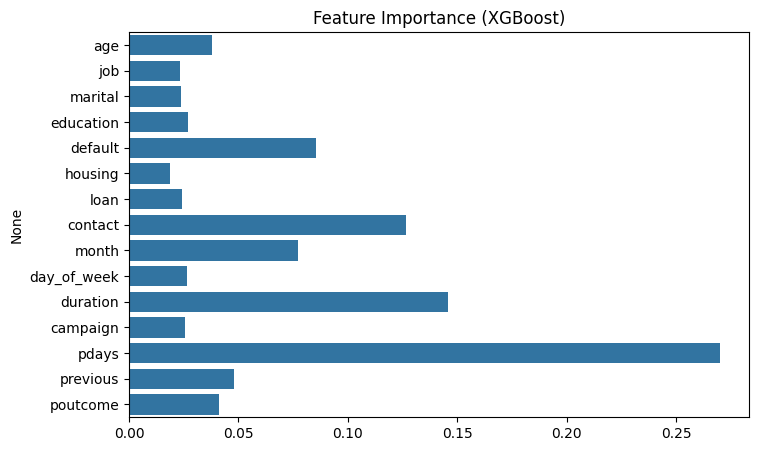

In [19]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8,5))
sns.barplot(x=model.feature_importances_,
    y=X.columns
)
plt.title("Feature Importance (XGBoost)")

The model shows that engagement and timing (recency, call duration, and contact type) are far stronger predictors of success than demographic factors.
This means banks should prioritize personalized, well-timed interactions over broad demographic targeting to improve campaign performance and client conversion rates.

